In [ ]:
 import numpy as np
 import pandas as pd

In [ ]:
 df = pd.read_csv('Iris.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [ ]:
df.head()

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['Species'] = encoder.fit_transform(df['Species'])

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [ ]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

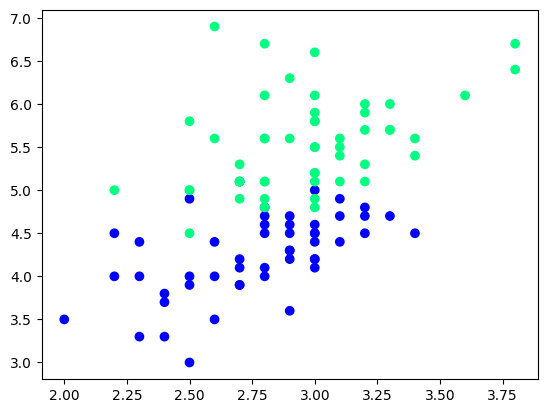

In [ ]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [ ]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
89,2.5,4.0,1
97,2.9,4.3,1
67,2.7,4.1,1
70,3.2,4.8,1
65,3.1,4.4,1
93,2.3,3.3,1
51,3.2,4.5,1
75,3.0,4.4,1
108,2.5,5.8,2


In [ ]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
df_train

,SepalWidthCm,PetalLengthCm,Species
112,3.0,5.5,2
74,2.9,4.3,1
70,3.2,4.8,1
54,2.8,4.6,1
85,3.4,4.5,1
65,3.1,4.4,1
55,2.8,4.5,1
148,3.4,5.4,2
69,2.5,3.9,1
86,3.1,4.7,1


In [ ]:
df_val

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
111,2.7,5.3,2
87,2.3,4.4,1
58,2.9,4.6,1
139,3.1,5.4,2


In [ ]:
df_test

,SepalWidthCm,PetalLengthCm,Species
105,3.0,6.6,2
146,2.5,5.0,2
80,2.4,3.8,1
134,2.6,5.6,2
91,3.0,4.6,1


In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [ ]:
y_test

array([2, 2, 1, 1, 2])

# Case 1 - Bagging

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
148,3.4,5.4,2
85,3.4,4.5,1
74,2.9,4.3,1
65,3.1,4.4,1
74,2.9,4.3,1
65,3.1,4.4,1
54,2.8,4.6,1
69,2.5,3.9,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
dt_bag1 = DecisionTreeClassifier()

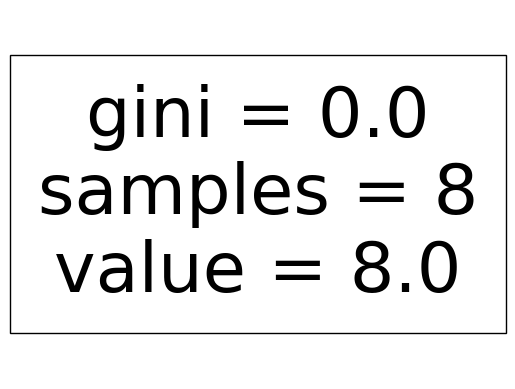

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


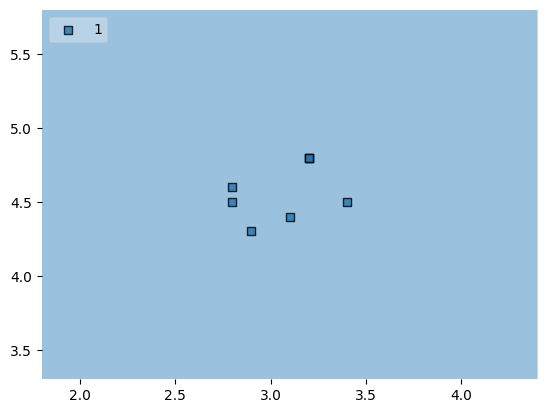

In [49]:
evaluate(dt_bag1,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [48]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


## Predict

In [54]:
df_test

,SepalWidthCm,PetalLengthCm,Species
105,3.0,6.6,2
146,2.5,5.0,2
80,2.4,3.8,1
134,2.6,5.6,2
91,3.0,4.6,1


In [ ]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

# Pasting

In [ ]:
# Row sampling without replacement
df_train

In [ ]:
df_train.sample(8)

# Random Subspaces

In [50]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [51]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
118,119,7.7,2.6,6.9,2.3,Iris-virginica
30,31,4.8,3.1,1.6,0.2,Iris-setosa
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df1.sample(2,replace=True,axis=1)

,Species,PetalLengthCm
118,Iris-virginica,6.9
30,Iris-setosa,1.6
53,Iris-versicolor,4.0
45,Iris-setosa,1.4
124,Iris-virginica,5.7
32,Iris-setosa,1.5
98,Iris-versicolor,3.0
42,Iris-setosa,1.3
46,Iris-setosa,1.6
4,Iris-setosa,1.4


# Random Patches

In [53]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
118,119,7.7,2.6,6.9,2.3,Iris-virginica
30,31,4.8,3.1,1.6,0.2,Iris-setosa
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalLengthCm,PetalWidthCm
124,5.7,2.1
4,1.4,0.2
98,3.0,1.1
98,3.0,1.1
124,5.7,2.1
45,1.4,0.3
32,1.5,0.1
45,1.4,0.3
